In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
 df = pd.read_csv('hr__data/aug_train.csv')

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [8]:
df.shape

(19158, 14)

In [9]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Handling Missing values

In [10]:
## Lets start by handling missing values
df['gender'].loc[df['gender'].isnull()==True] = 'Undefined'  #since nan values is really high we will treat it as a seperate category

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
df.gender.value_counts()

Male         13221
Undefined     4508
Female        1238
Other          191
Name: gender, dtype: int64

In [12]:
df.gender.isna().sum()

0

In [13]:
df['enrolled_university'].loc[df['enrolled_university'].isnull()==True]='no_enrollment'  
#Here the nan values are small so we just add it to majority class

In [14]:
df.enrolled_university.value_counts()

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [15]:
df['education_level'].loc[df['education_level'].isnull()==True]='Graduate' 
# the nan values are very small so we will just add into graduate category


In [16]:
df.education_level.value_counts()

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [17]:
df['major_discipline'].loc[df['major_discipline'].isnull()==True]='STEM'
df.major_discipline.value_counts()

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [18]:
df.experience.replace('>20','22',inplace=True) # replacing special chars(like >,+) with numbers
df.experience.replace('<1','0',inplace=True)
df.experience=pd.to_numeric(df.experience)
df['experience']=np.where(df['experience']>10,'Senior-level', np.where(df['experience']>3,'Intermediate-level' ,'Entry-Level'))
# here we are creating a class interval for each level of experience

In [19]:
df.company_size.replace('<10','9',inplace=True) # replacing special chars(like >,+) with numbers
df.company_size.replace('10/49','20',inplace=True)
df.company_size.replace('50-99','55',inplace=True)
df.company_size.replace('100-500','300',inplace=True)
df.company_size.replace('10000+','10001',inplace=True)
df.company_size.replace('500-999','600',inplace=True)
df.company_size.replace('5000-9999','6000',inplace=True)
df.company_size.replace('1000-4999','3000',inplace=True)
df.company_size= pd.to_numeric(df.company_size)
df['company_size']=np.where(df['company_size']>2000,'Large-org.', np.where(df['company_size']>1,'Small & Medium-org.','Undefined'))
# here we are creating a class interval for various company sizes

In [20]:
df['company_type'].loc[df['company_type'].isnull()==True]='Pvt Ltd'

In [21]:
df.last_new_job.replace('>4','5',inplace=True)
df.last_new_job.replace('never','0',inplace=True)
df.last_new_job.fillna(1,inplace=True)    #Replace with majority category of 1 year diff
df.last_new_job=df.last_new_job.astype(int)

In [22]:
df.isna().sum() # no column has nan value left we can proceed now

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Encoding Categorical variables

In [23]:
## Time to encode the categories

categorical_cols=[name for name in df.columns if df[name].dtype not in ['int','float']]  
categorical_cols
#fetches categorical features needed to be encoded

['enrollee_id',
 'city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'training_hours']

In [24]:
new_df=df.copy() #lets make a new df to which we want to make changes
new_df.relevent_experience= new_df.relevent_experience.map({"Has relevent experience":1,"No relevent experience":0})

In [25]:
#Ordinal encoder because these categories follow a rank like 1st,2nd,3rd etc
from sklearn.preprocessing import OrdinalEncoder
enc_ordered_cat=OrdinalEncoder(categories=[['Undefined',"Small & Medium-org.",'Large-org.'],["Entry-Level","Intermediate-level" ,'Senior-level'],['Primary School','High School',"Graduate",'Masters','Phd']])
ordinal_feat=enc_ordered_cat.fit_transform(new_df[['company_size','experience','education_level']])
enc_ordered_cat.categories_

[array(['Undefined', 'Small & Medium-org.', 'Large-org.'], dtype=object),
 array(['Entry-Level', 'Intermediate-level', 'Senior-level'], dtype=object),
 array(['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
       dtype=object)]

In [26]:
#OneHot encode because these categories are independent of each other
one_hot_cat=new_df[['gender','major_discipline', 'company_type','enrolled_university']]
one_hot=pd.get_dummies(one_hot_cat)

In [27]:
new_df.drop(["company_type","gender","major_discipline","enrolled_university"],axis=1,inplace=True)
new_df.drop(['company_size','experience','education_level'],axis=1,inplace=True)

### Combining all dataframes to get a final df

In [28]:
full_df=pd.concat([new_df,one_hot],axis=1)


ordinal_feat_df= pd.DataFrame(data=ordinal_feat,dtype='int32')      #converting the np array of ordinal encoded feat to dataframe
ordinal_feat_df.columns=['company_size','experience','education_level']

all_df= pd.concat([full_df,ordinal_feat_df],axis=1) # here is the final dateframe that we are going to work with 
all_df.head() 


all_df.drop(['enrollee_id', 'city'],inplace=True,axis=1)
all_df.head()

,city_development_index,relevent_experience,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,gender_Undefined,major_discipline_Arts,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,company_size,experience,education_level
0,0.920,1,1,36,1.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,2,2
1,0.776,0,5,47,0.0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,2,2
2,0.624,0,0,83,0.0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,2
3,0.789,0,0,52,1.0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,2
4,0.767,1,4,8,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,2,3


### Correlation of features with target class

In [30]:
from sklearn.preprocessing import scale  #training hours can have a magnitude as it shows relatively high numbers

all_df['training_hours']=scale(all_df['training_hours'])     #scales down to unit variance
all_df['training_hours']= np.floor(all_df['training_hours'])

all_df.corr()['target']

city_development_index                 -0.341665
relevent_experience                    -0.128430
last_new_job                           -0.084607
training_hours                         -0.021991
target                                  1.000000
gender_Female                           0.008494
gender_Male                            -0.074256
gender_Other                            0.002884
gender_Undefined                        0.075356
major_discipline_Arts                  -0.010659
major_discipline_Business Degree        0.004157
major_discipline_Humanities            -0.016965
major_discipline_No Major              -0.000680
major_discipline_Other                  0.006048
major_discipline_STEM                   0.010221
company_type_Early Stage Startup       -0.005775
company_type_Funded Startup            -0.059421
company_type_NGO                       -0.024412
company_type_Other                     -0.001783
company_type_Public Sector             -0.015593
company_type_Pvt Ltd

### Treating imbalanced targets

Imbalanced target class: Counter({0.0: 14381, 1.0: 4777}) Balanced target class:Counter({1.0: 14381, 0.0: 14381})


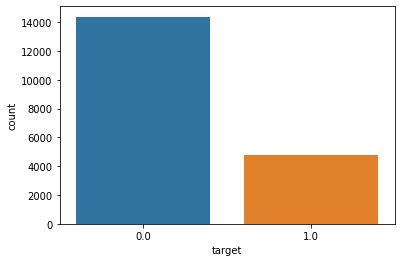

In [31]:
y=all_df['target']
X=all_df.drop('target',axis=1)


y.value_counts()   # the number people that will change job are way less than those who wont -DATA IS IMBALANCED
sns.countplot(y) 


from imblearn.over_sampling import RandomOverSampler
from collections import Counter


rand=RandomOverSampler(random_state=42)
x_ros, y_ros = rand.fit_resample(X, y)
print(f"Imbalanced target class: {Counter(y)} Balanced target class:{Counter(y_ros)}")

### Training and testing data split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.3,shuffle=True)
#make sure shuffle is set to true because we dont want to get data belonging to one class

### Model building

In [33]:
from sklearn.ensemble import RandomForestClassifier  # In my opinion RF will be ideal as it we have many feat like yes or no questions which can be use in decision making 
rf=RandomForestClassifier()
rf.get_params() #fetches rf params

rf.fit(X_train,y_train)

predictions= rf.predict(X_test)

### Lets see how well our model performed!

In [34]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,classification_report
print(f"Roc-Auc score: {roc_auc_score(y_test,predictions)},f1_score: {f1_score(y_test,predictions)},Accuracy: {accuracy_score(y_test,predictions)}")
print(classification_report(y_test,predictions))
# The precision-recall, accuracy scores are very promising but wait until we cross check it with the validation set

Roc-Auc score: 0.8404862868440106,f1_score: 0.8501415813548248,Accuracy: 0.8405377216363425
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      4311
         1.0       0.80      0.90      0.85      4318

    accuracy                           0.84      8629
   macro avg       0.85      0.84      0.84      8629
weighted avg       0.85      0.84      0.84      8629



### Cross validation

In [35]:
from sklearn.model_selection import cross_val_score,StratifiedKFold        # lets validate our val_accuracy
skfold = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)
scores=cross_val_score(rf,X_test,y_test,cv=skfold)
print("best score:{:.3f}".format(np.mean(scores)))              # validation looks good

best score:0.773


### Testing on new testset

In [36]:
all_df.to_csv("all_test.csv")
new_test= pd.read_csv('./all_test.csv')
new_test_X=new_test.drop(["Unnamed: 0",'target'],axis=1)
new_test_y=new_test["target"]

In [37]:
pred=rf.predict(new_test_X) 
#fitting our random forest into new test data and geting the probability of candidate leaving or staying 
pred

array([1., 0., 1., ..., 0., 0., 0.])

In [38]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,classification_report
print(f"Roc-Auc score: {roc_auc_score(new_test_y,pred)},f1_score: {f1_score(new_test_y,pred)},Accuracy: {accuracy_score(new_test_y,pred)}")
print(classification_report(new_test_y,pred))

Roc-Auc score: 0.8986931023953422,f1_score: 0.8015613652868556,Accuracy: 0.8858962313393882
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92     14381
         1.0       0.71      0.92      0.80      4777

    accuracy                           0.89     19158
   macro avg       0.84      0.90      0.86     19158
weighted avg       0.91      0.89      0.89     19158



In [39]:
from sklearn.model_selection import cross_val_score,StratifiedKFold  # lets validate our val_accuracy
skfold = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
scores=cross_val_score(rf,new_test_X,new_test_y,cv=skfold)
print("best score:{:.3f}".format(np.mean(scores)))

best score:0.765


In [40]:
import pickle
# save your precious model :)
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))